In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('heart.csv')

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [18]:
data.shape

(1025, 14)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [20]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
#chech duplicate
data.duplicated().sum()

723

In [22]:
data_heart = data.drop_duplicates()


In [23]:
data_heart.duplicated().sum()

0

In [25]:
print("shape before removing duplicates:", data.shape)
print("shape after removing duplicates:", data_heart.shape)

shape before removing duplicates: (1025, 14)
shape after removing duplicates: (302, 14)


In [27]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

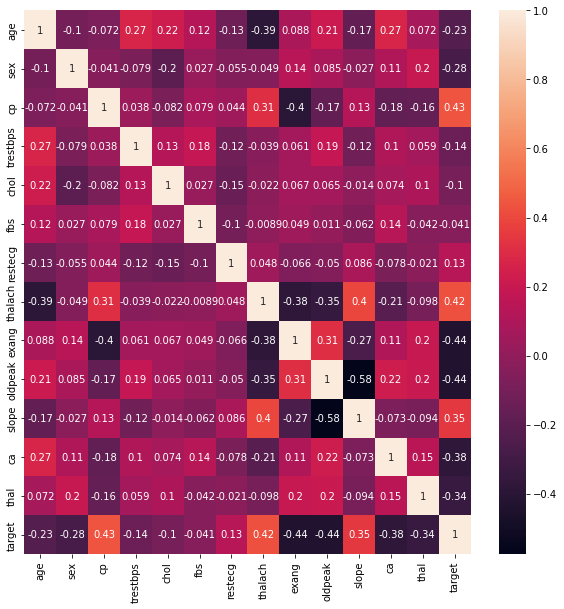

In [31]:
#draw correlation matrix
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)


In [33]:
#How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?
data_heart.groupby('target').size()


target
0    138
1    164
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

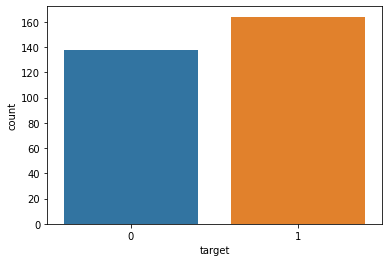

In [34]:
sns.countplot(x='target',data=data_heart)

In [35]:
data_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
#Find Count of  Male & Female in this Dataset
data_heart['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

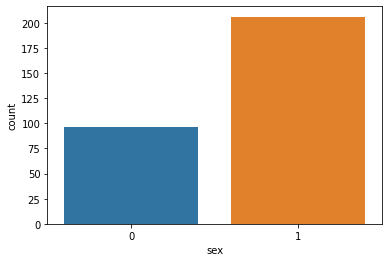

In [42]:
sns.countplot(x = "sex",data=data_heart)

In [43]:
data_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

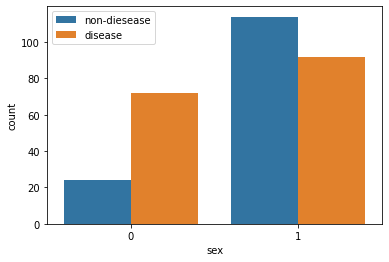

In [45]:
#Find Gender Distribution According to The Target Variable
sns.countplot(x="sex",hue="target",data=data_heart)
plt.legend(labels=["non-diesease","disease"])
plt.show()

C:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


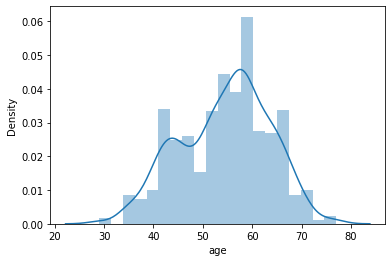

In [48]:
sns.distplot(data['age'],bins=20)
plt.show()

<AxesSubplot:xlabel='cp', ylabel='count'>

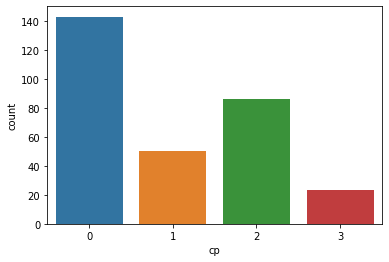

In [49]:
#check test pain type
#0,1,2,3
sns.countplot(x="cp",data=data_heart)

<AxesSubplot:xlabel='cp', ylabel='count'>

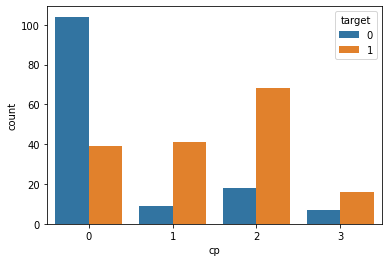

In [53]:
sns.countplot(x="cp",hue="target",data=data_heart)

<AxesSubplot:xlabel='fbs', ylabel='count'>

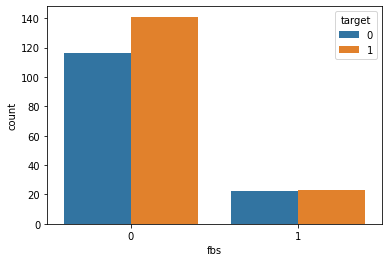

In [54]:
sns.countplot(x="fbs",hue="target",data=data_heart)

In [56]:
#check resting bp
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

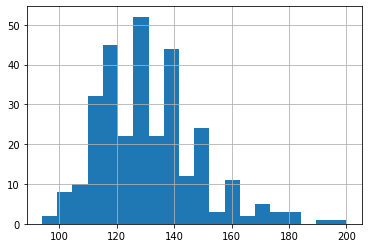

In [58]:
data_heart['trestbps'].hist(bins=20)

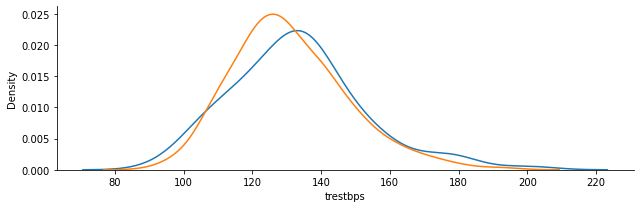

In [61]:
#compare reting bp as per sex
#fasset grid is used to check he distribution relation to multiple variables
f = sns.FacetGrid(data_heart,hue="sex",aspect=3)
f.map(sns.kdeplot,"trestbps")

In [62]:
#plot continuous val
cate_val = []
cont_val = []
for column in data_heart.columns:
    if data_heart[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [63]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [64]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

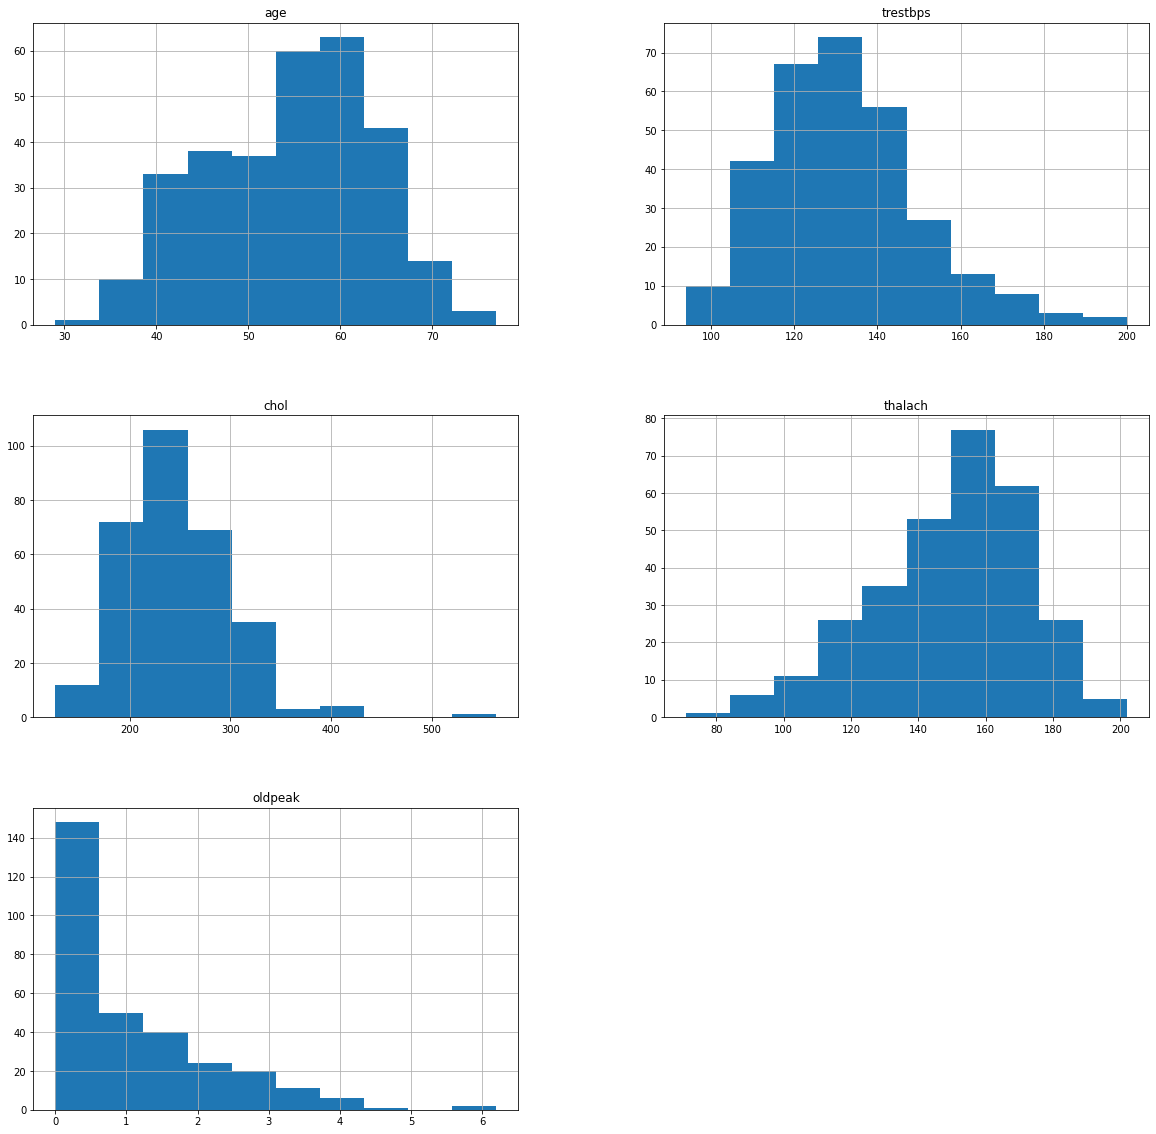

In [65]:
data_heart.hist(cont_val,figsize=(20,20))
plt.show()